<a href="https://colab.research.google.com/github/arashsajjadi/Bigdata/blob/main/Shahid%20Beheshti%20University%20course/Assignments/First%20series/Question1_4/BigDataFirstAss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The first series of assignments



## Question 1.


### Import required libraries

The only library I use is Numpy library

In [1]:
import numpy as np

### Define the required functions for the first question

I have defined three functions in this section. As the name suggests, the prime of the function called **prime_factors** is responsible for finding the prime factors of numbers. Also, the **Map** and **Reduce** functions have clear responsibilities. Of course, according to the input type of the question, I defined the Reduce function a little *inaccurately*. In fact, prime number pairs and main numbers should be given as factors, which I represented the **Reduce** function with a bit of *tolerance* to answer all possible situations.

In [2]:
def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return np.unique( np.array(factors) )

def Map(n):
  PrimeFactors=prime_factors(n)
  NumberOf_PF=len(PrimeFactors)
  map=[]
  for i in np.arange(NumberOf_PF):
    map.append( (PrimeFactors[i],n)  )
  return map

def Reduce (Array):
  npArray=np.array(np.sort(np.unique( np.array(Array))))
  length=len(npArray)
  AllMap=[]
  AllPrime=np.array([])
  for i in np.arange(len(Array)):
    AllPrime=np.concatenate([AllPrime,prime_factors(Array[i])])
  AllPrime=np.sort(np.unique( np.array(AllPrime)))
  for i in np.arange(length):
    AllMap.append(Map(npArray[i]))
  AllMapConcatenated=np.concatenate(AllMap)
  tmp=np.matrix(AllMapConcatenated)
  output=np.matrix(np.ones((len(AllPrime),2)))
  output[:,0]=np.expand_dims(AllPrime, axis=1) 
  for i in AllPrime:
    index=np.where( tmp[:,0]== i)[0]
    tmp2=np.squeeze(np.array(tmp[index,1]))
    output[np.where(output[:,0]==i),1]=tmp2.sum()

  print("Map:\n",AllMapConcatenated)
  print("ALL prime factors: ",AllPrime)
  print('reduced form:')
  return output




### Calculate the final output

According to the form of the question, I have to calculate the output of the MapReduce function for the numbers 15,21,24,30,49.

In [3]:
Reduce([49,30,24,21,15])

Map:
 [[ 3 15]
 [ 5 15]
 [ 3 21]
 [ 7 21]
 [ 2 24]
 [ 3 24]
 [ 2 30]
 [ 3 30]
 [ 5 30]
 [ 7 49]]
ALL prime factors:  [2. 3. 5. 7.]
reduced form:


matrix([[ 2., 70.],
        [ 3., 90.],
        [ 5., 45.],
        [ 7., 70.]])

Therefore, the output of the MapReduce function will be as follows.

| $p$ 	| $\sum _ { j = 1 } ^ { k } i _ j$ 	|
|-----	|----------------------------------	|
|  2  	|                70                	|
| 3   	| 90                               	|
| 5   	| 45                               	|
| 7   	| 70                               	|

 ## Question 2.

### Sparse matrix representation

First, I have to write the following matrices in a sparse format in a file.



$\begin{pmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10& 11& 12\\
13& 14& 15& 16\\
\end{pmatrix}.\begin{bmatrix}
 1\\ 2\\ 3\\ 4\\
\end{bmatrix}$


-----

$A=\begin{pmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10& 11& 12\\
13& 14& 15& 16\\
\end{pmatrix}$ $\hspace{1cm}$    and  $\hspace{1cm}$  $B=\begin{bmatrix}
 1\\ 2\\ 3\\ 4\\
\end{bmatrix}$




### Getting input
> Sparse matrix representation is as follows:



In [4]:
!cat input.txt

A,0,0,1
A,0,1,2
A,0,2,3
A,0,3,4
A,1,0,5
A,1,1,6
A,1,2,7
A,1,3,8
A,2,0,9
A,2,1,10
A,2,2,11
A,2,3,12
A,3,0,13
A,3,1,14
A,3,2,15
A,3,3,16
B,0,0,1
B,1,0,2
B,2,0,3
B,3,0,4




### Definition of Map and Reduce functions

In [5]:
!cat mapper.py

#!/usr/bin/env python

import sys
cache_info = open("cache.txt").readlines()[0].split(",")
row_a, col_b = map(int,cache_info)

for line in sys.stdin:
	matrix_index, row, col, value = line.rstrip().split(",")
	if matrix_index == "A":
		for i in range(0,col_b):
			key = row + "," + str(i)
			print ("%s\t%s\t%s"%(key,col,value))
	else:
		for j in range(0,row_a):
			key = str(j) + "," + col 
			print ("%s\t%s\t%s"%(key,row,value))


In [6]:
!cat reducer.py

#!/usr/bin/env python

import sys
from operator import itemgetter

prev_index = None
value_list = []

for line in sys.stdin:
    curr_index, index, value = line.rstrip().split("\t")
    index, value = map(int,[index,value])
    if curr_index == prev_index:
        value_list.append((index,value))
    else:
        if prev_index:
            value_list = sorted(value_list,key=itemgetter(0))
            i = 0
            result = 0
            while i < len(value_list) - 1:
                if value_list[i][0] == value_list[i + 1][0]:
                    result += value_list[i][1]*value_list[i + 1][1]
                    i += 2
                else:
                    i += 1
            print("%s,%s"%(prev_index,str(result)))
        prev_index = curr_index
        value_list = [(index,value)]

if curr_index == prev_index:
    value_list = sorted(value_list,key=itemgetter(0))
    i = 0
    result = 0
    while i < len(value_list) - 1:
        if value_list[i][0] == value_list[i + 1][0]:


### Final result

In [7]:
!cat input.txt | python mapper.py | sort | python reducer.py

Traceback (most recent call last):
  File "mapper.py", line 8, in <module>
    matrix_index, row, col, value = line.rstrip().split(",")
ValueError: not enough values to unpack (expected 4, got 1)
0,0,30
1,0,70
2,0,110
3,0,150


I implemented **matrix multiplication** precisely like what was presented in the *Big Data* course. The final result is as shape as forward.

$\hspace{2cm} AB=\begin{bmatrix}
30\\ 
70\\ 
110\\ 
150
\end{bmatrix}$

## Question 3.

### Description of the problem
I want to calculate joining two relations which are called R and S.



<table>
<tr><th> R </th><th> S </th></tr>
<tr><td>

| A 	| B 	|
|:-:	|:-:	|
| 0 	| 1 	|
| 1 	| 2 	|
| 2 	| 3 	|


</td><td>

| B 	| C 	|
|:-:	|:-:	|
| 0 	| 1 	|
| 1 	| 2 	|
| 2 	| 3 	|

</td></tr> </table>




> An example of the path I should take can be seen in the figure below.



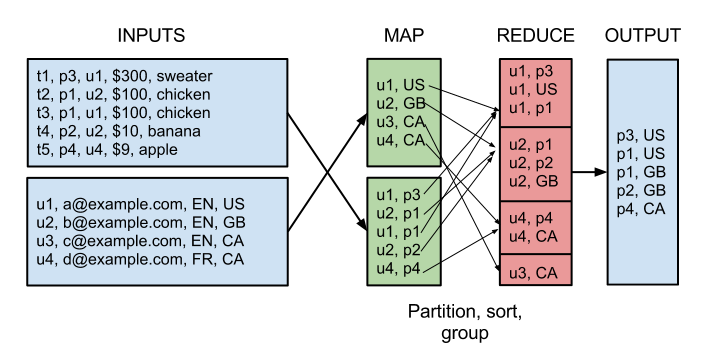

### Import required libraries

The only libraries I use is Numpy and Pandas library

In [8]:
import numpy as np
import pandas as pd

### Define the mentioned variables in the third question

First, I will define the S and R relations by a data frame, as stated in the fourth question.

In [9]:
R = {'A': [0,1, 2], 'B': [1,2,3]}
R_df = pd.DataFrame(data=R)

S = {'B': [0,1, 2], 'C': [1,2,3]}
S_df = pd.DataFrame(data=S)

display(R_df)
print("--------")
display(S_df)

colnames=R_df.columns

,A,B
0,0,1
1,1,2
2,2,3


--------


,B,C
0,0,1
1,1,2
2,2,3


### Define the required functions for the third question


I need three functions for the MapReduce process: Map, sort, and reduce. Of course, due to some issues related to programming and ease, I did not follow the exact definition of the functions algebraically. Still, the performance is entirely similar to the original version.

In [10]:
def Mapper (df1,df2):
  CommonColName=(np.intersect1d(list(df1.columns),list(df2.columns)))[0]
  df1.insert(0, CommonColName, df1.pop(CommonColName))
  df2.insert(0, CommonColName, df2.pop(CommonColName))

  return df1 , df2, CommonColName

def sort_MR(df1 , df2, CommonColName):
  df1.sort_values(by=[CommonColName])
  df2.sort_values(by=[CommonColName])
  return df1 , df2

def reducer(df1 , df2, CommonColName):
   return pd.merge(df1, df2, how='inner', on=[CommonColName]).dropna()


### Calculate the final output

I have considered the output as it is considered in section 2.3.7 (page 37) of the Mining of Massive Datasets book. In this book section, the Author considered the correct output in a three-dimensional tuple format. But the above figure believed a two-dimensional tuple format as the final result. In general, there is no difference in the concept. But I tried to stick to the original course book.

In [11]:

df1 , df2, CommonColName=Mapper(R_df,S_df)
df1 , df2=sort_MR( df1 , df2, CommonColName )
output=reducer(df1 , df2, CommonColName)
output.insert(0, colnames[0], output.pop(colnames[0]))
display(output)

,A,B,C
0,0,1,2
1,1,2,3


## Question 4.

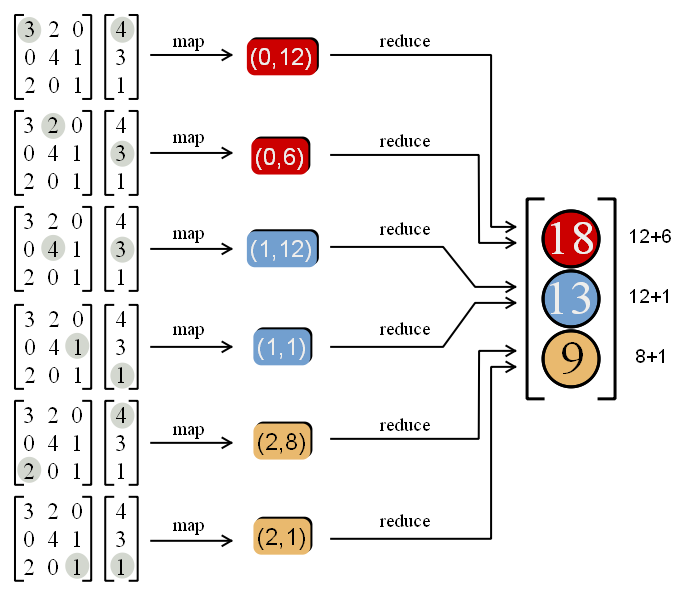

As can be seen in the above figure, the answer to this question is wholly related to the **number of non-zero elements** of the matrices. Therefore, x, y and z are not suitable parameters to answer this question. But for simplicity, I assume that all elements in both matrices are non-zero. This way, I will get at least an **upper bound** to answer this question.

It is obvious that the lower bound of the answer to this question is the case where we want to multiply two matrices with all their roots being zero. In this case, the number of map function keys is zero.

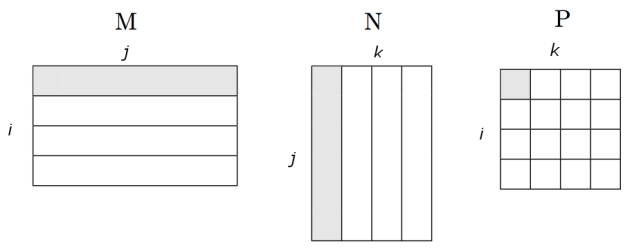

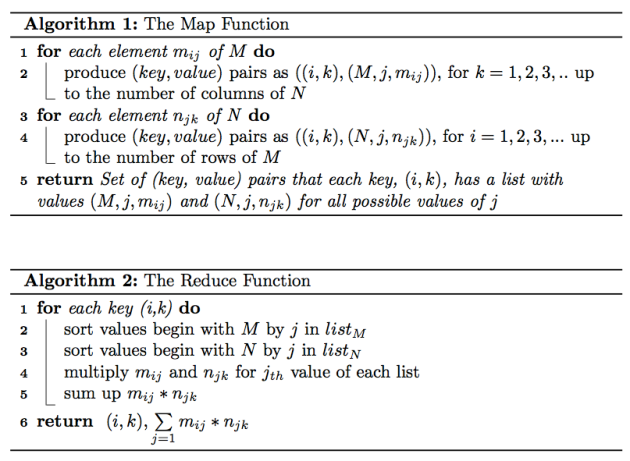

According to the above algorithm, I obtained the answer to the fourth multi-part question as follows


> A)

1.   $z+x$
2.   $x.z$
3.   $x.z$



> B)


1.   $x.y.z$
2.   $x+z$





